<a href="https://colab.research.google.com/github/Shalin-Chakraborty/Encryptix-Internship/blob/main/Encryptix_Task_2_CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kaggle preinstallation

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shalinchakraborty","key":"52d2674e436fdec72bb71750f6ca42f1"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d kartik2112/fraud-detection

Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip fraud-detection.zip

Archive:  fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


#Import all the necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
import math
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
import datetime as dt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics  import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import precision_score  , recall_score , accuracy_score, f1_score
from sklearn.model_selection import train_test_split , GridSearchCV ,  PredefinedSplit
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

#Load data

In [5]:
df_train = pd.read_csv('fraudTrain.csv')
df_test = pd.read_csv('fraudTest.csv')

##Reading the data

In [6]:
df = pd.concat([df_train,df_test])

In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
display(df)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [10]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [11]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [12]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [13]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [14]:
df.shape

(1852394, 23)

#Exploratory Data Analysis(EDA)

<Axes: >

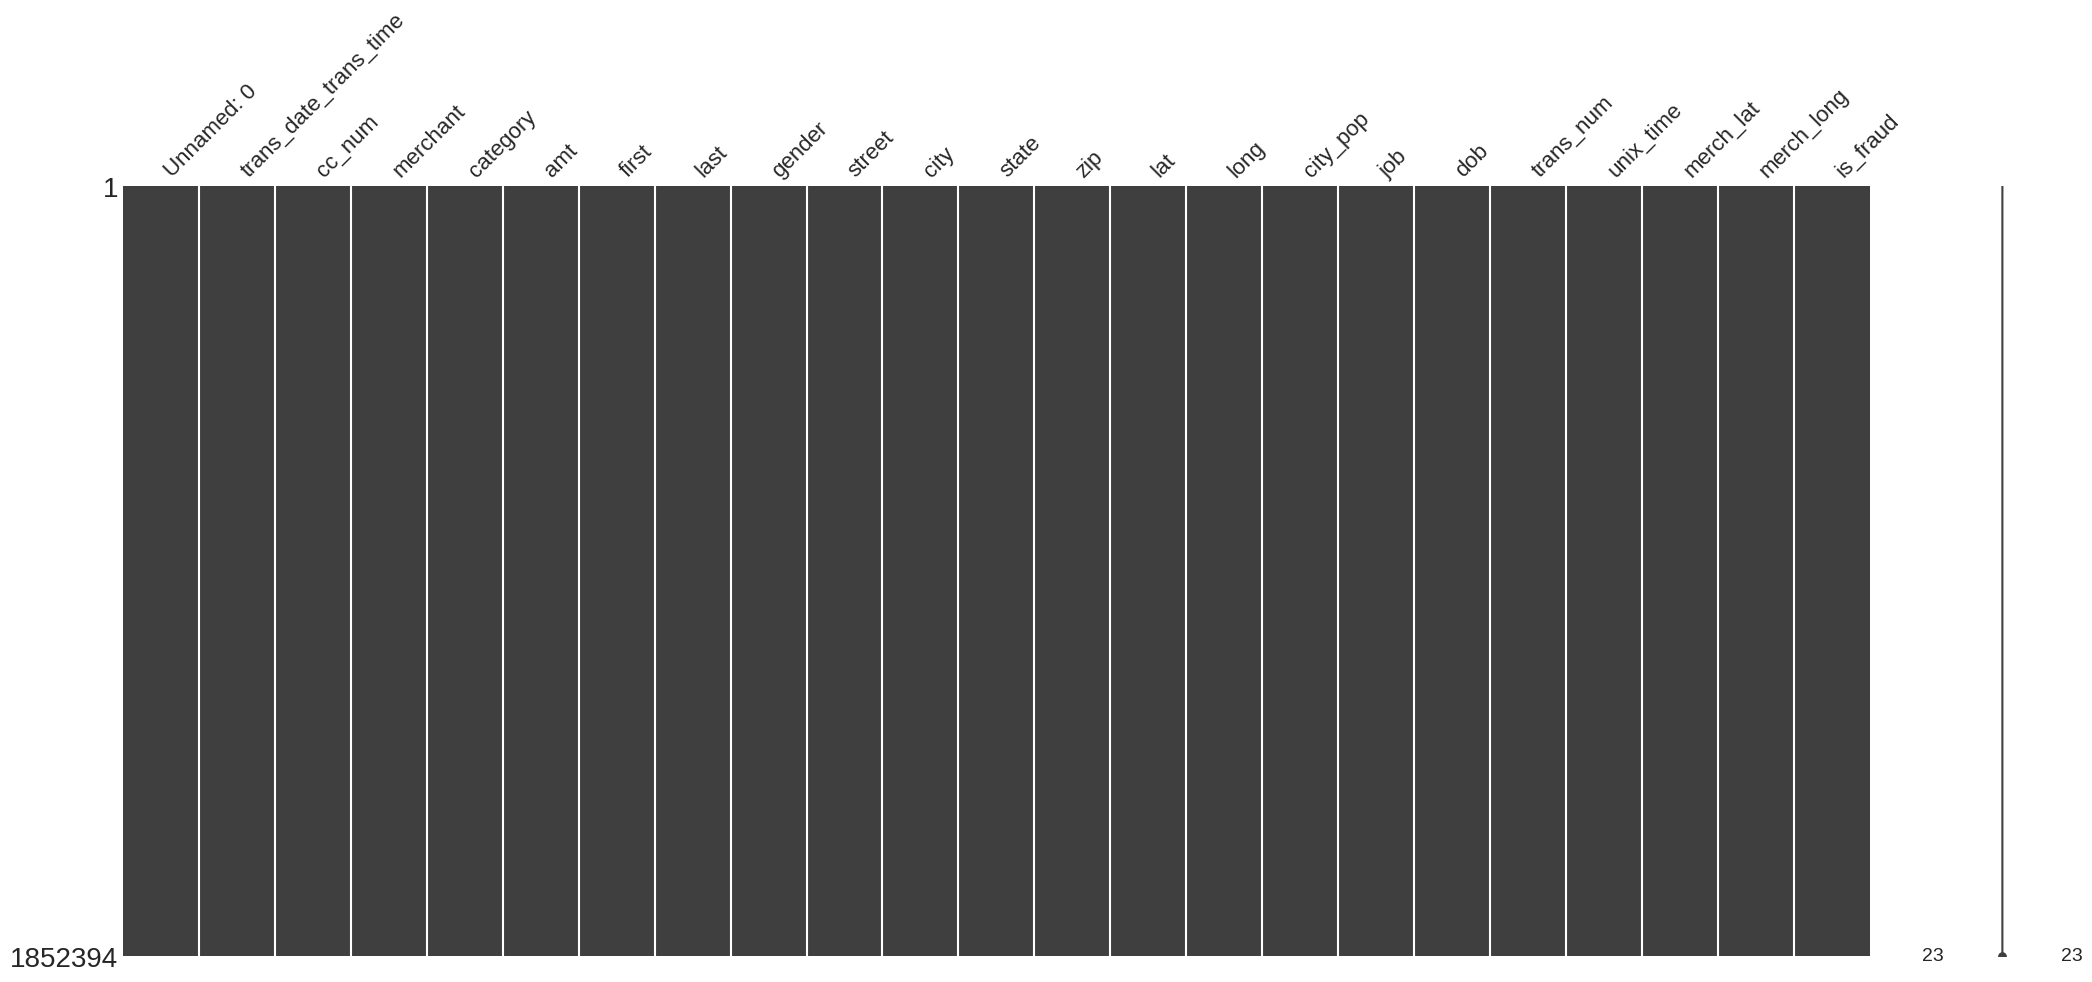

In [15]:
msno.matrix(df)

<Axes: >

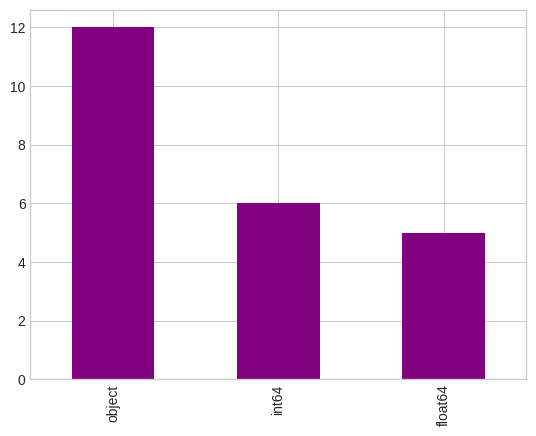

In [ ]:
df.dtypes.value_counts().plot(kind='bar', color="purple")

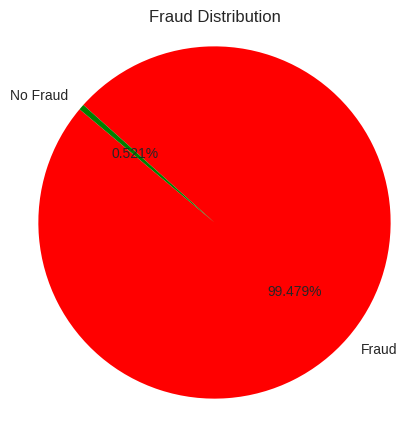

In [ ]:
# Assuming 'df' is your pandas DataFrame
fraud_counts = df['is_fraud'].value_counts().sort_values(ascending=False)

# Separate fraud and non-fraud counts
fraud_count = fraud_counts.iloc[0] if 0 in fraud_counts.index else 0
non_fraud_count = fraud_counts.iloc[1] if 1 in fraud_counts.index else 0

# Configure the plot
plt.figure(figsize=(5, 5))  # Adjust figure size as desired
plt.pie([fraud_count, non_fraud_count], labels=['Fraud', 'No Fraud'], autopct="%1.3f%%", startangle=140, colors=['red', 'green'])
plt.title("Fraud Distribution")
plt.axis('equal')  # Equal aspect ratio creates a donut chart

# Display the plot
plt.show()

In [ ]:
print(df['is_fraud'].value_counts()[0])
print(df['is_fraud'].value_counts()[1])

1842743
9651


<Axes: xlabel='amt', ylabel='Density'>

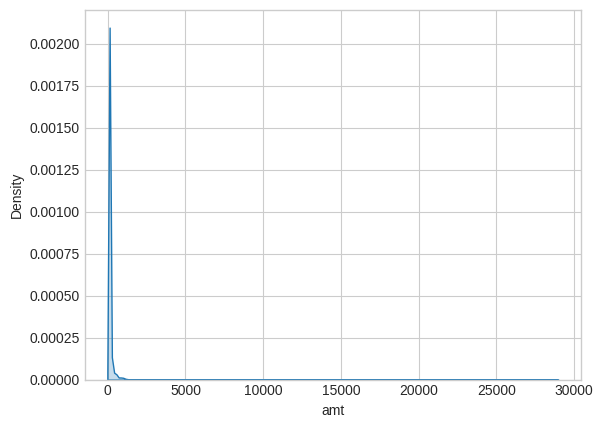

In [ ]:
sns.kdeplot(df["amt"], fill=True)

<Axes: xlabel='amt', ylabel='Density'>

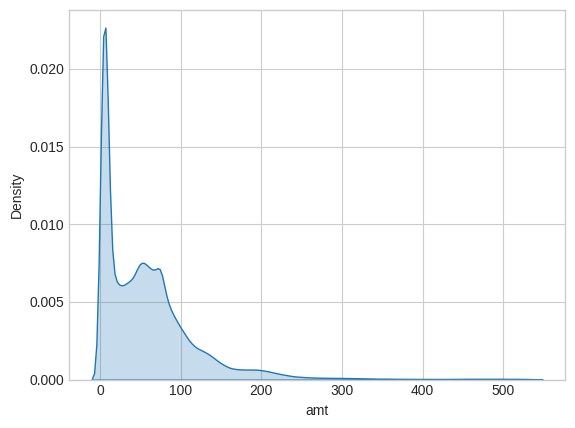

In [ ]:
p99 = df["amt"].quantile(0.99)
sns.kdeplot(x="amt", data=df[df["amt"] <= p99], fill=True)

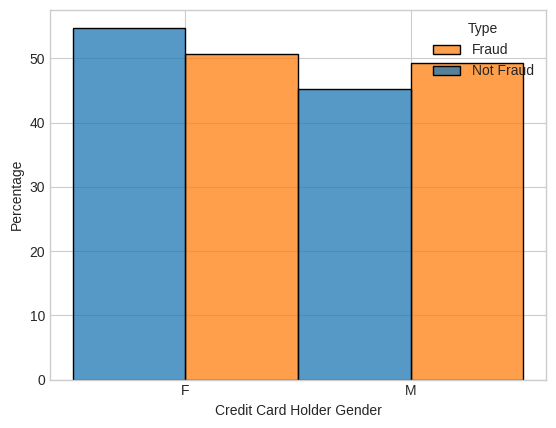

In [ ]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

<ipython-input-21-3a23f5cd44ab>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


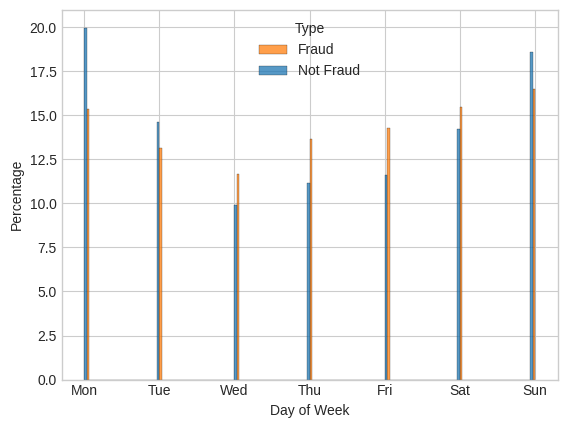

In [ ]:
#day of week vs fraud
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

###Multivariate Analysis

<Axes: xlabel='amt', ylabel='Probability'>

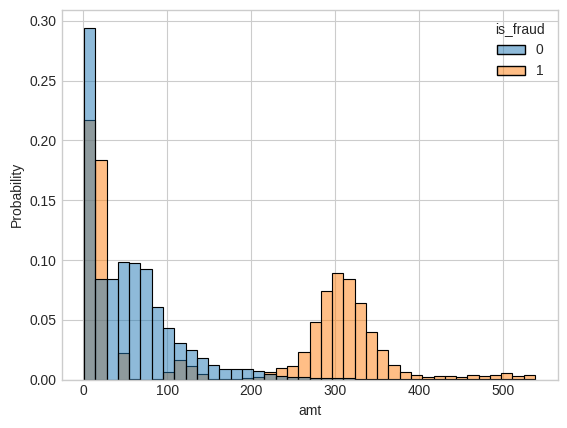

In [ ]:
sns.histplot(x="amt", hue="is_fraud", bins=40, stat="probability", data=df[df["amt"] <= p99], common_norm=False)

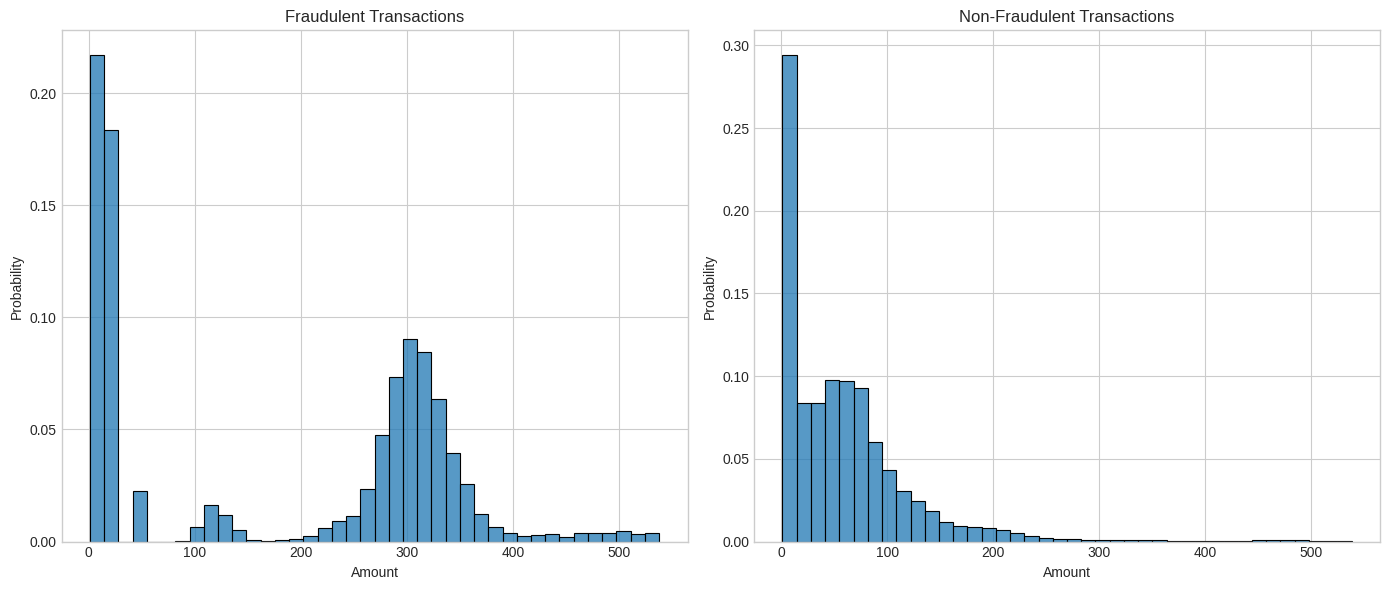

In [ ]:
filtered_df = df[df["amt"] <= p99]

# Create separate DataFrames for each value of is_fraud
df_fraud = filtered_df[filtered_df["is_fraud"] == 1]
df_non_fraud = filtered_df[filtered_df["is_fraud"] == 0]

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for is_fraud == 1
sns.histplot(x="amt", bins=40, stat="probability", data=df_fraud, common_norm=False, ax=axes[0])
axes[0].set_title("Fraudulent Transactions")
axes[0].set_xlabel("Amount")
axes[0].set_ylabel("Probability")

# Plot for is_fraud == 0
sns.histplot(x="amt", bins=40, stat="probability", data=df_non_fraud, common_norm=False, ax=axes[1])
axes[1].set_title("Non-Fraudulent Transactions")
axes[1].set_xlabel("Amount")
axes[1].set_ylabel("Probability")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

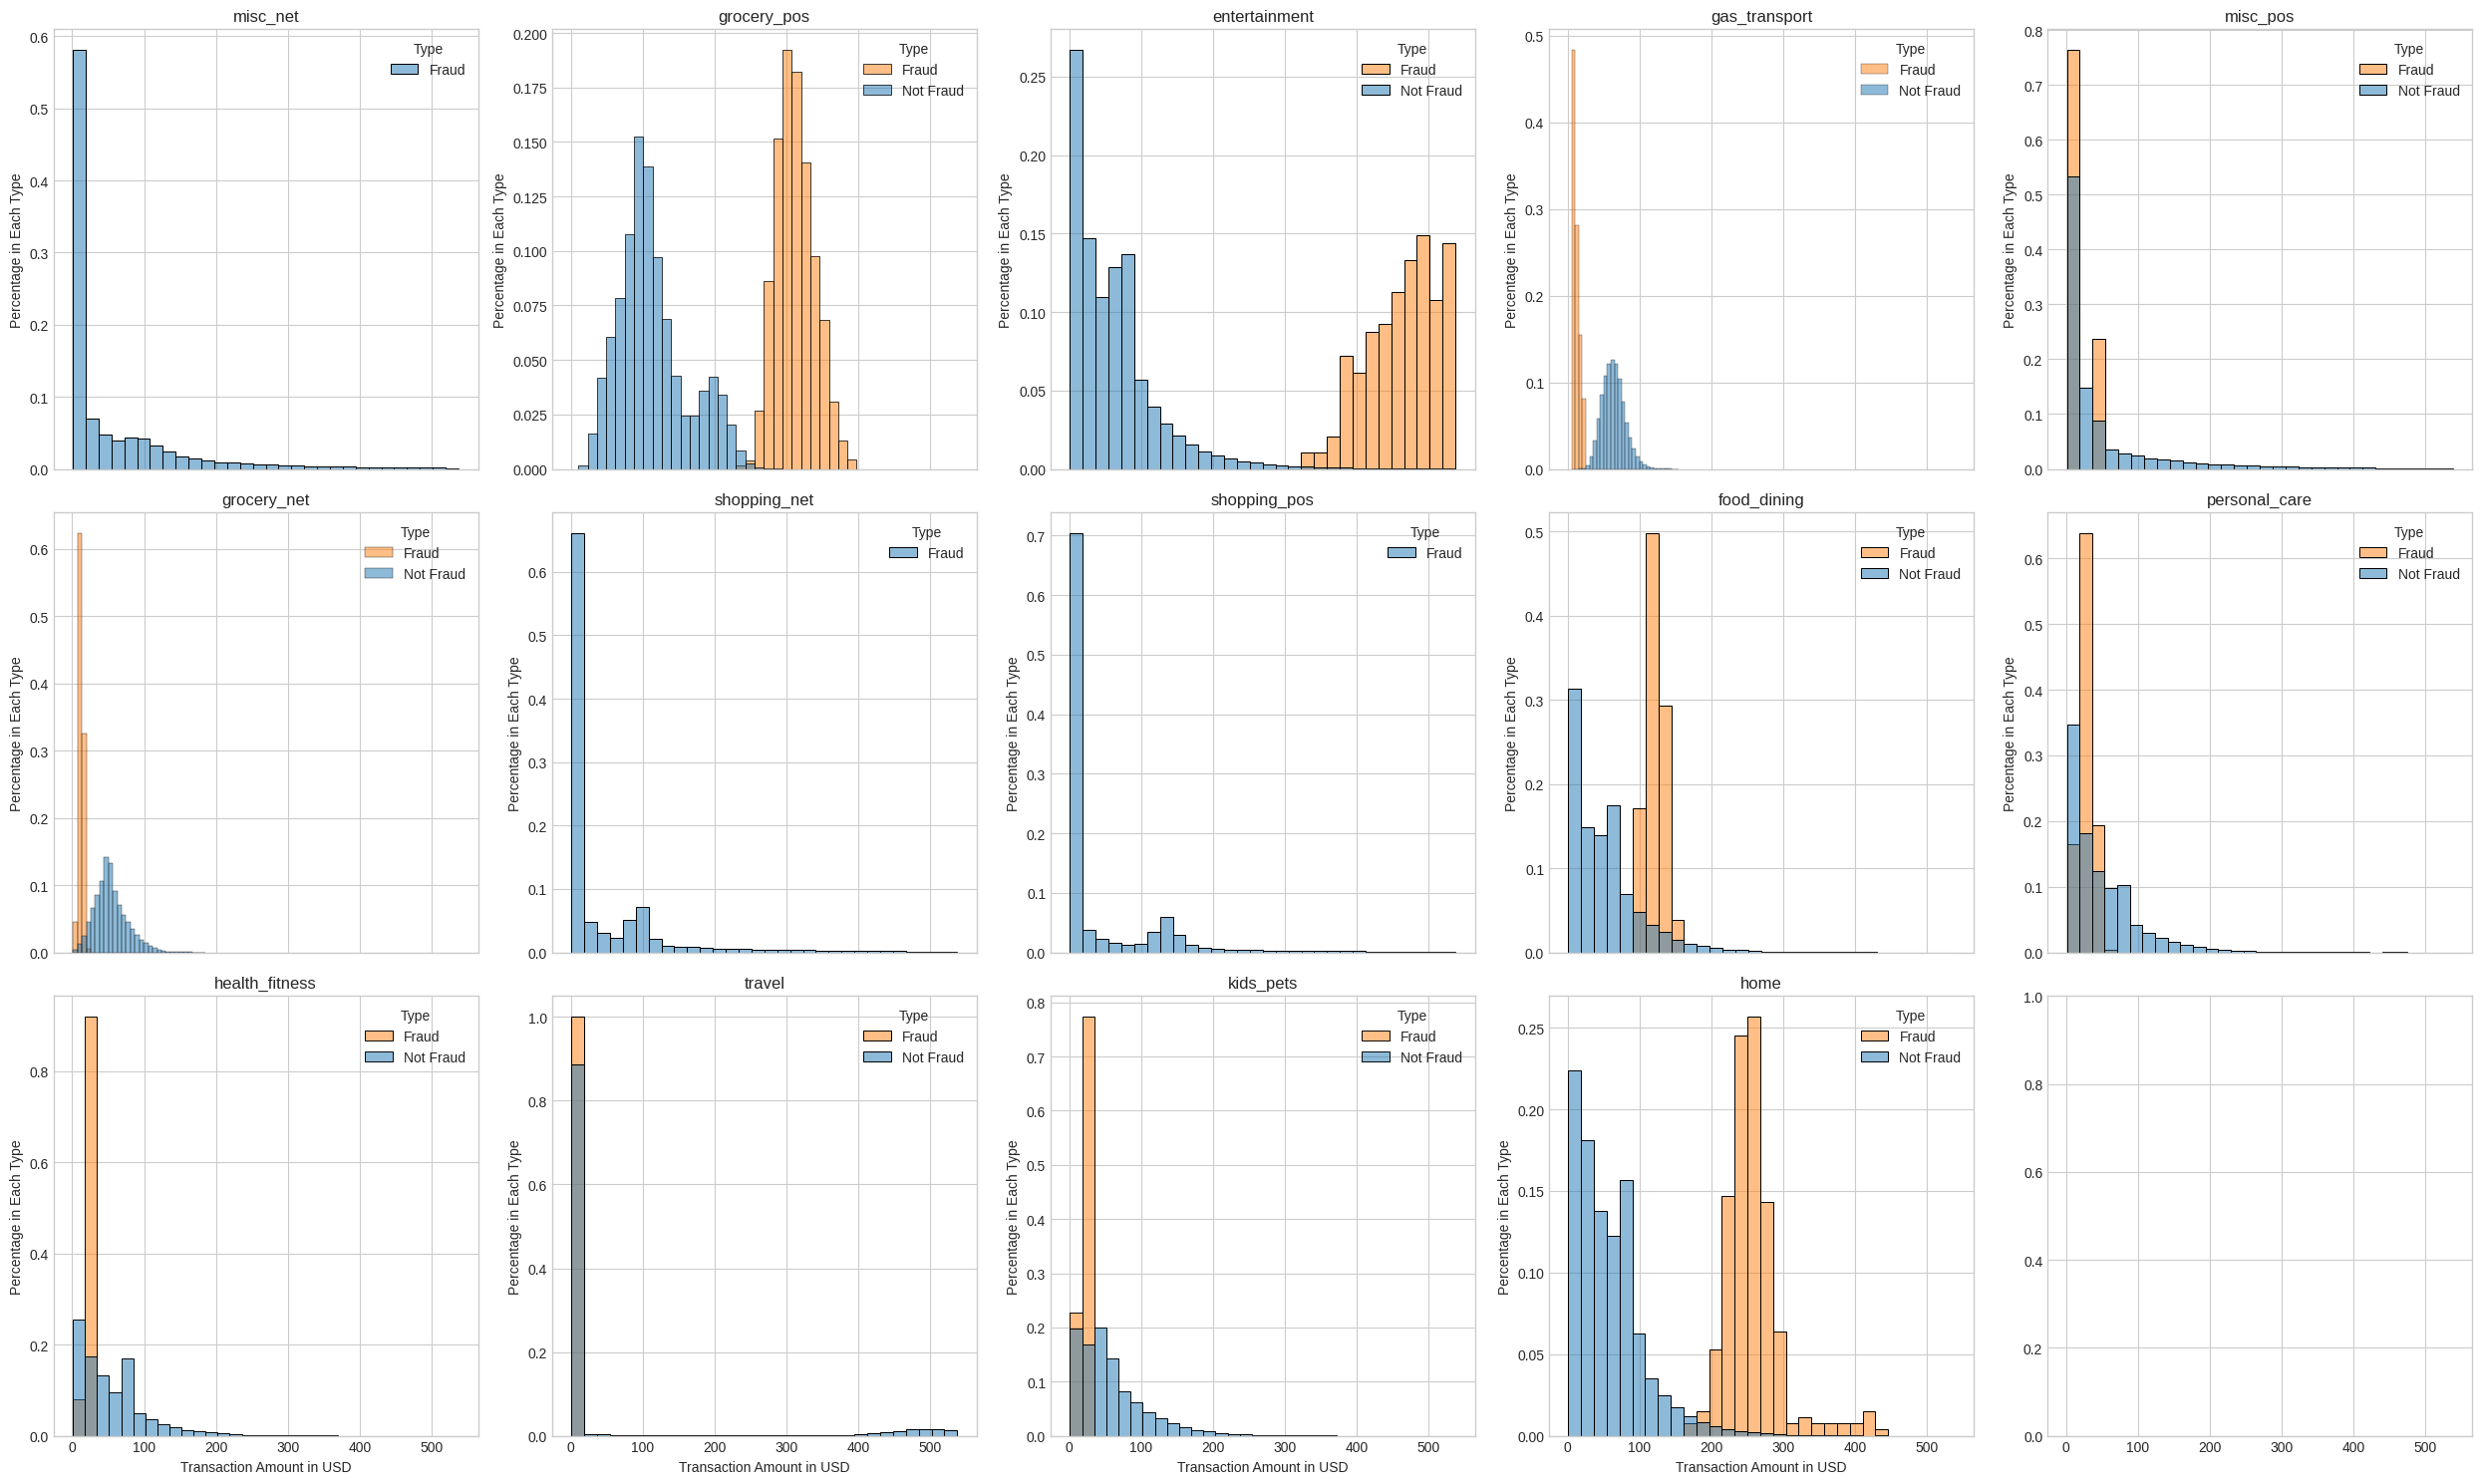

In [ ]:
categories = df['category'].unique()

num_plots = len(categories)
num_rows = math.isqrt(num_plots)
num_cols = math.ceil(num_plots / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(
    5*num_cols, 5*num_rows), sharex=True)

for i, category in enumerate(categories):

    row = i // num_cols
    col = i % num_cols

    data_category = df[df['category'] == category]

    if num_rows == 1 and num_cols == 1:
        ax = axes
    elif num_rows == 1 or num_cols == 1:
        ax = axes[i]
    else:
        ax = axes[row, col]

    sns.histplot(x='amt', data=data_category[data_category['amt'] <= p99],
                 hue='is_fraud', stat='probability',
                 common_norm=False, bins=30, ax=ax)

    ax.set_ylabel('Percentage in Each Type')
    ax.set_xlabel('Transaction Amount in USD')
    ax.set_title(f'{category}')
    ax.legend(title='Type', labels=['Fraud', 'Not Fraud'])

plt.tight_layout()

plt.show()

In [ ]:
# non_fraud
non_fraud = df[df['is_fraud'] == 0]['category'].value_counts(normalize=True).to_frame().reset_index()
non_fraud.columns = ['category', 'not_fraud_percentual_vs_total']

# fraud
fraud = df[df['is_fraud'] == 1]['category'].value_counts(normalize=True).to_frame().reset_index()
fraud.columns = ['category', 'fraud_percentage_vs_total']

# merging two dataframes and calculating "fraud level"
non_fraud_vs_fraud = non_fraud.merge(fraud, on='category')
non_fraud_vs_fraud['fraud_level'] = non_fraud_vs_fraud['fraud_percentage_vs_total'] - \
    non_fraud_vs_fraud['not_fraud_percentual_vs_total']

non_fraud_vs_fraud

,category,not_fraud_percentual_vs_total,fraud_percentage_vs_total,fraud_level
0,gas_transport,0.101619,0.079992,-0.021627
1,home,0.095073,0.027458,-0.067615
2,grocery_pos,0.094404,0.230857,0.136453
3,shopping_pos,0.089761,0.109419,0.019657
4,kids_pets,0.087599,0.031499,-0.056100
5,shopping_net,0.074402,0.229924,0.155523
6,entertainment,0.072623,0.030256,-0.042367
7,food_dining,0.070831,0.021241,-0.049590
8,personal_care,0.070436,0.030049,-0.040387
9,health_fitness,0.066405,0.019169,-0.047236


<ipython-input-26-39bb548beb77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='category', x='fraud_level', data=non_fraud_vs_fraud.sort_values('fraud_level', ascending=False), palette=custom_palette)
<ipython-input-26-39bb548beb77>:2: UserWarning: 
The palette list has fewer values (6) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(y='category', x='fraud_level', data=non_fraud_vs_fraud.sort_values('fraud_level', ascending=False), palette=custom_palette)


Text(0.5, 1.0, 'Fraud Level')

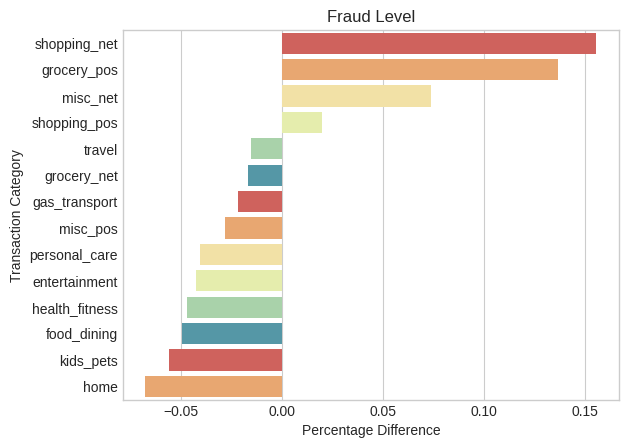

In [ ]:
custom_palette = sns.color_palette("Spectral")
ax = sns.barplot(y='category', x='fraud_level', data=non_fraud_vs_fraud.sort_values('fraud_level', ascending=False), palette=custom_palette)
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('Fraud Level')

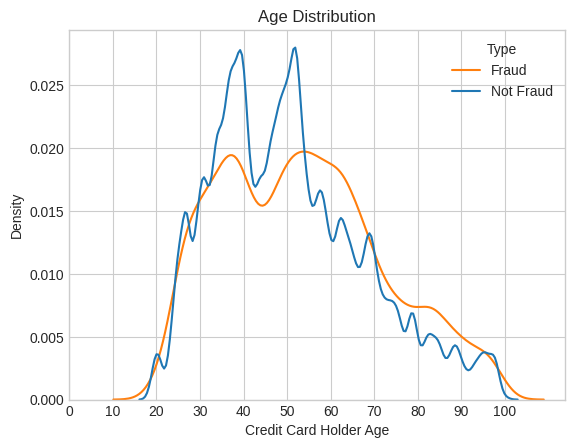

In [ ]:
df['age'] = dt.date.today().year-pd.to_datetime(df['dob']).dt.year
ax = sns.kdeplot(x='age', data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0, 110, 10))
plt.title('Age Distribution')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

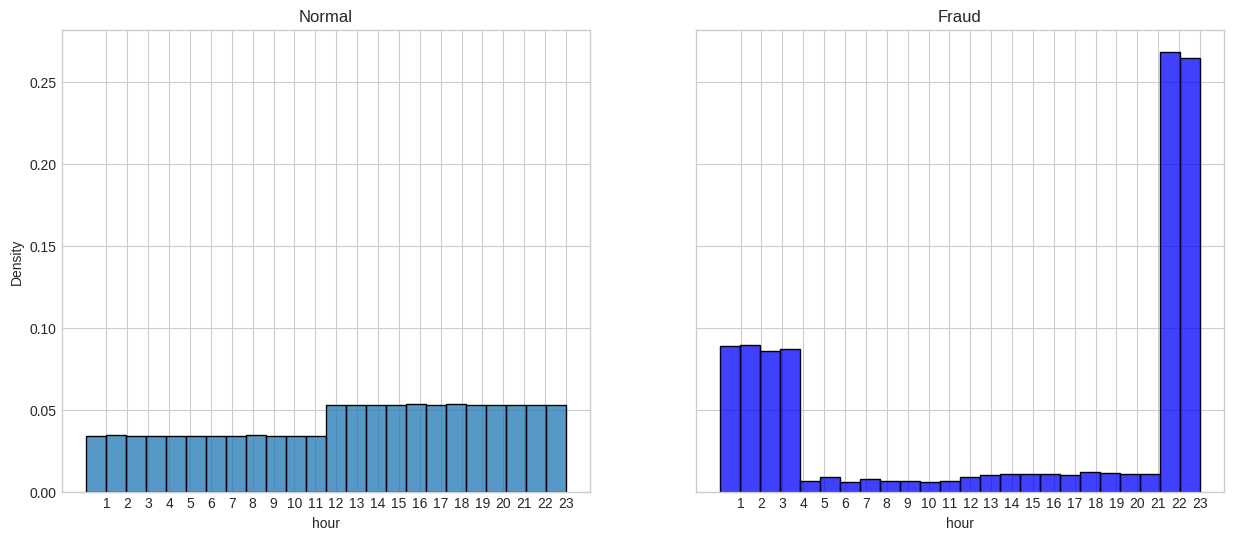

In [ ]:
df['hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='hour', data=df[df["is_fraud"] == 0], stat="density", bins=24, ax=ax1)
ax2 = sns.histplot(x='hour', data=df[df["is_fraud"] == 1], stat="density", bins=24, ax=ax2, color="blue")
ax1.set_title("Normal")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 24))
ax2.set_xticks(np.arange(1, 24));

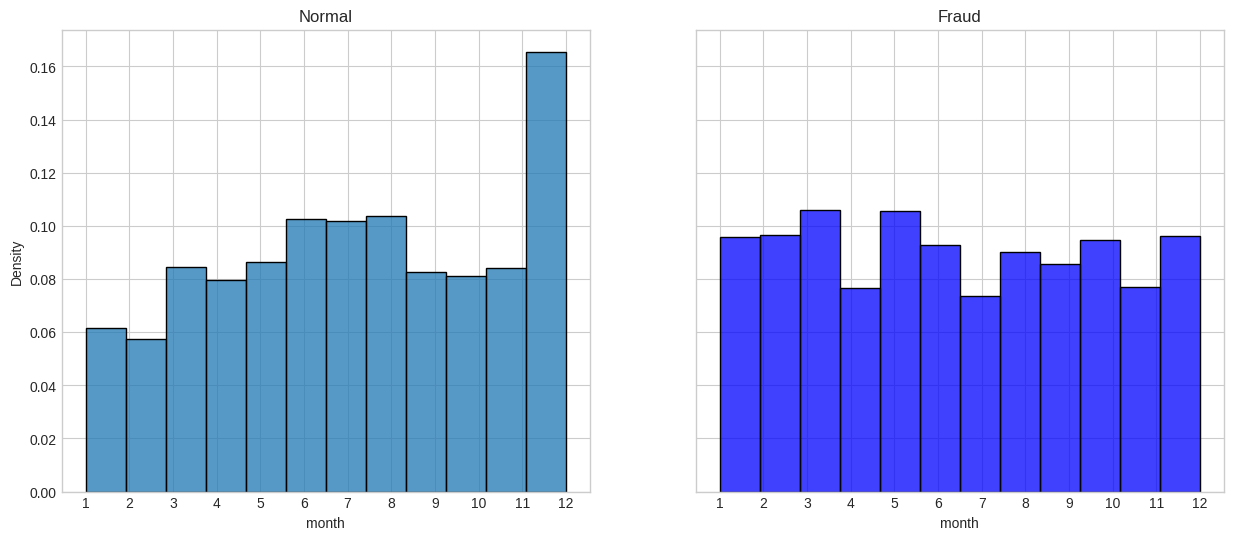

In [ ]:
df['month'] = pd.to_datetime(df['trans_date_trans_time']).dt.month
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
ax1 = sns.histplot(x='month', data=df[df["is_fraud"] == 0],stat="density", bins=12, ax=ax1)
ax2 = sns.histplot(x='month', data=df[df["is_fraud"] == 1],stat="density", bins=12, ax=ax2, color="blue")
ax1.set_title("Normal")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 13))
ax2.set_xticks(np.arange(1, 13))

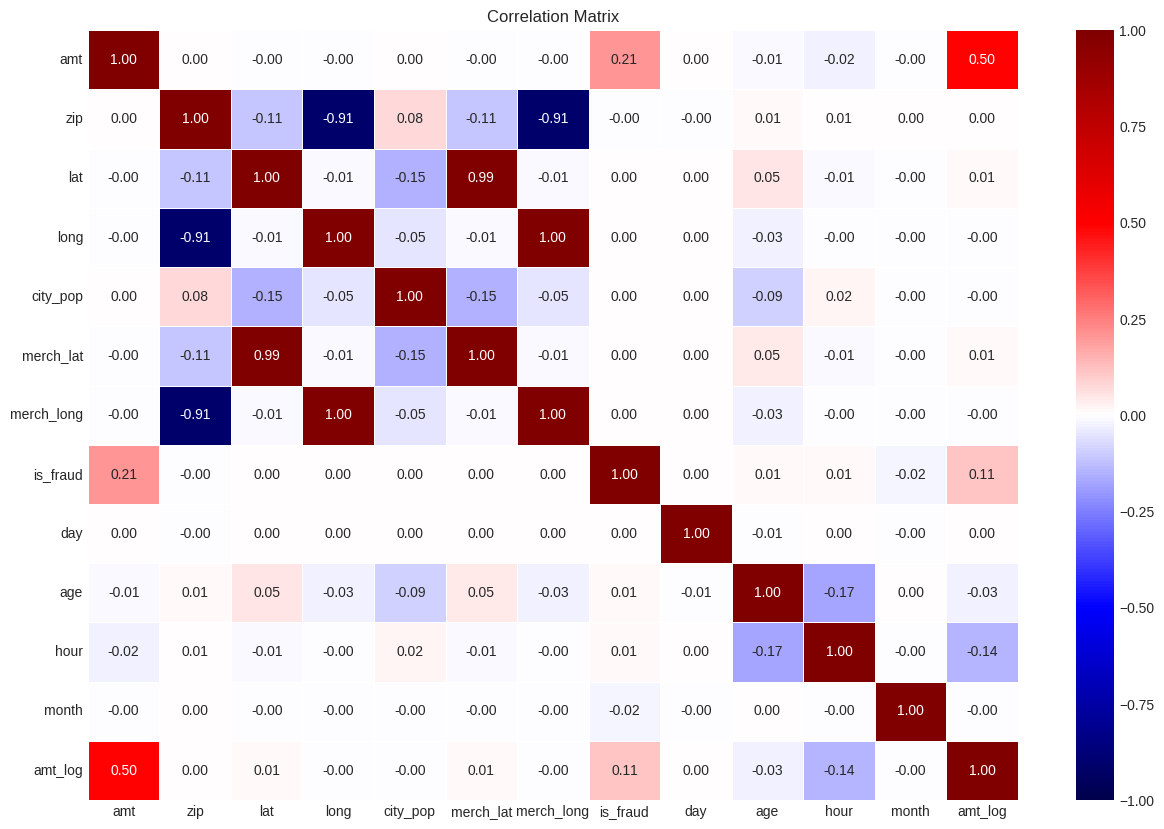

In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic", xticklabels=True, yticklabels=True, annot=True,cbar_kws={"orientation": "vertical"}, fmt=".2f", linewidth=.5)
plt.gca().patch.set(hatch="X", edgecolor="#666")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
numeric_columns = df.select_dtypes(include='number')
fraud_correlation = numeric_columns.corr()['is_fraud'].abs().sort_values(ascending=False)
print(fraud_correlation)

is_fraud      1.000000
amt           0.209308
month         0.016417
unix_time     0.013329
hour          0.013196
age           0.011103
day           0.004562
lat           0.002904
merch_lat     0.002778
zip           0.002190
cc_num        0.001125
long          0.001022
merch_long    0.000999
Unnamed: 0    0.000524
city_pop      0.000325
Name: is_fraud, dtype: float64


In [ ]:
groups = ['is_fraud','job']
df_ = df.groupby(by=groups).agg({"amt":'mean',"trans_num":"count"}).fillna(0).reset_index()

# Top 10 jobs had most fraud transactions.
df_ = df_[df_.is_fraud==1].sort_values(by='trans_num', ascending=False).drop_duplicates('job', keep='first').iloc[:10, :]
df_

,is_fraud,job,amt,trans_num
856,1,Quantity surveyor,611.805652,69
782,1,Naval architect,650.121970,66
760,1,Materials engineer,561.092097,62
517,1,Audiological scientist,662.505172,58
894,1,Senior tax professional/tax inspector,570.492456,57
952,1,Trading standards officer,478.137143,56
819,1,Podiatrist,477.762593,54
667,1,Film/video editor,528.820577,52
661,1,Exhibition designer,524.067255,51
567,1,Colour technologist,440.824706,51


In [ ]:
fig = px.bar(df_, y='job', x='trans_num', color='amt', color_continuous_scale=px.colors.sequential.Magma,
             labels={'job':'Job title', 'transaction_id': 'Number of fraud transactions'}, category_orders = {"job": df_.job.values},width=960,height=600)

fig.update_layout(
    title=dict(
        text='Amount(usd) among top 10 jobs with the most fraud transactions'
    ),
    plot_bgcolor='#fafafa'
)

fig.update_coloraxes(
    colorbar=dict(
        title='Amount(usd) of transactions',
        orientation='h',
        x=1
    ),
    reversescale=True
)

fig.show()

<ipython-input-34-f4dce8882ed4>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




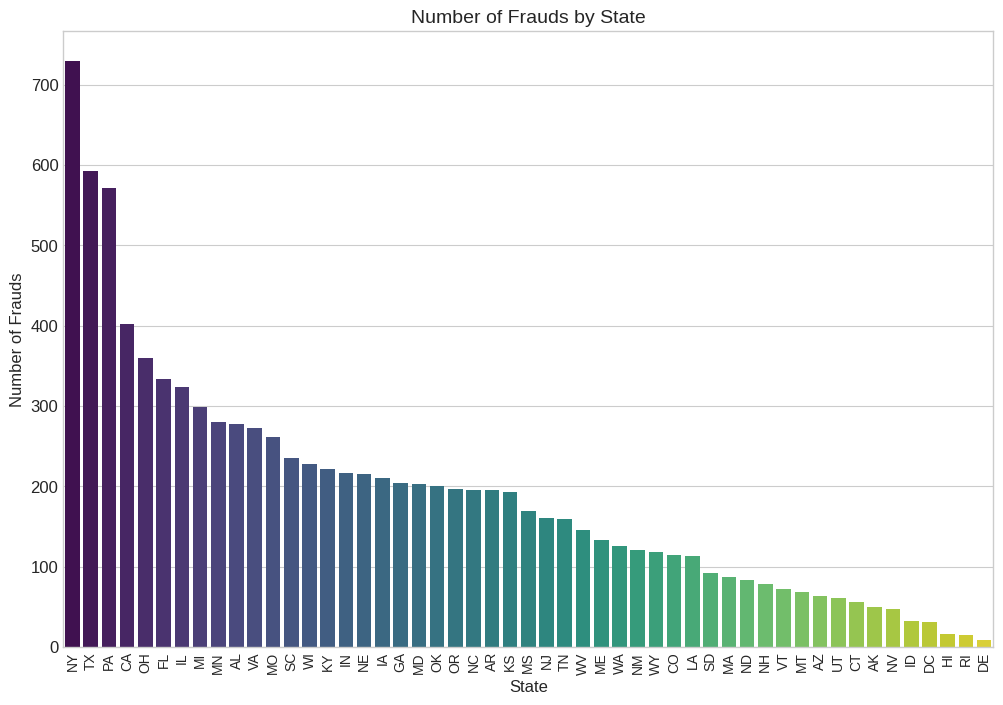

In [ ]:
# Filter the DataFrame to include only fraudulent transactions
fraud_data = df[df['is_fraud'] == 1]

# Group by 'state' and count the number of frauds
fraud_by_state = fraud_data['state'].value_counts().reset_index()
fraud_by_state.columns = ['state', 'num_frauds']

# Plot the histogram
plt.figure(figsize=(12, 8))
sns.barplot(x='state', y='num_frauds', data=fraud_by_state, palette='viridis')
plt.xticks(rotation=90, fontsize=10)  # Rotate state labels for better readability
plt.yticks(fontsize=12)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Frauds', fontsize=12)
plt.title('Number of Frauds by State', fontsize=14)
plt.show()

<ipython-input-35-aa23cc74f87f>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




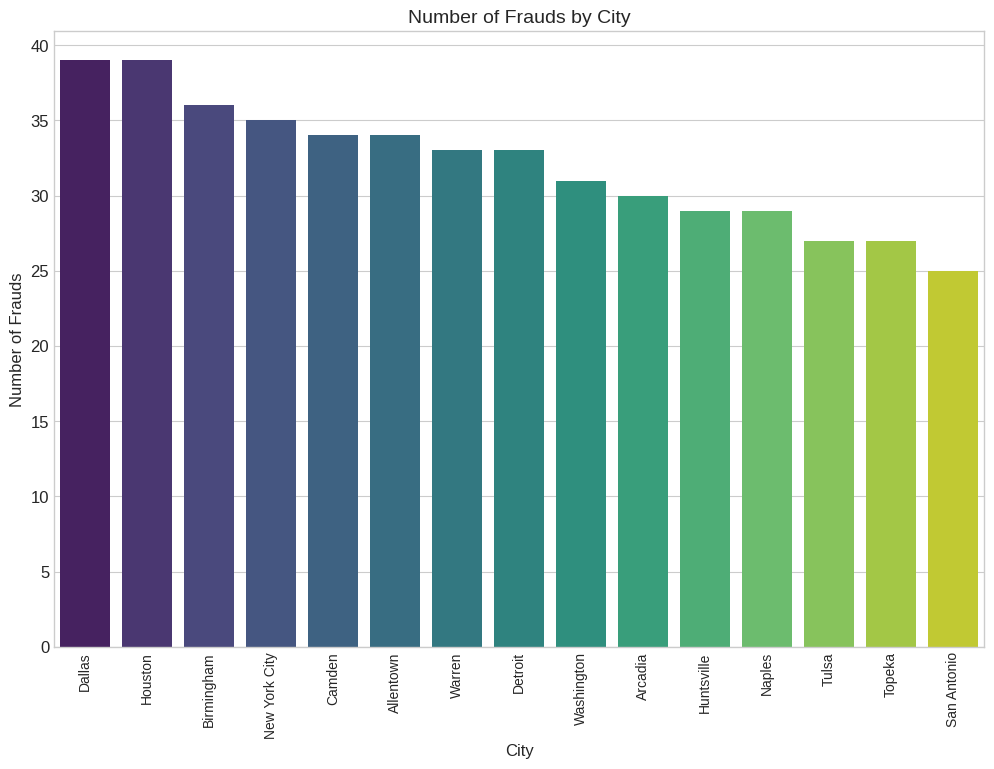

In [ ]:
# Group by 'city' and count the number of frauds
fraud_by_city = fraud_data['city'].value_counts().reset_index().head(15)
fraud_by_city.columns = ['city', 'num_frauds']

# Plot the histogram
plt.figure(figsize=(12, 8))
sns.barplot(x='city', y='num_frauds', data=fraud_by_city, palette='viridis')
plt.xticks(rotation=90, fontsize=10)  # Rotate state labels for better readability
plt.yticks(fontsize=12)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Frauds', fontsize=12)
plt.title('Number of Frauds by City', fontsize=14)
plt.show()

#Data Preprocessing

In [ ]:
columns_dropped = ["Unnamed: 0" , "cc_num" , "merchant" , "first" , "last" , "street" ,
                "lat" , "long" , "job" , "trans_num" , "unix_time" , "merch_lat" , "merch_long" , "city" , "state" , "zip"]
df.drop(columns = columns_dropped, inplace = True)

In [ ]:
df.sample(5)

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud
469465,2020-12-13 07:59:47,grocery_net,49.12,M,970,1993-09-29,0
104641,2019-03-02 05:11:53,misc_net,128.72,M,645,1974-05-18,0
351726,2019-06-14 09:00:08,gas_transport,68.47,M,15269,1993-07-05,0
1083586,2020-03-26 02:35:08,food_dining,82.36,M,8512,1951-09-03,0
478832,2019-07-29 00:30:35,grocery_pos,120.38,M,645,1974-05-18,0


##Scaling

<Axes: xlabel='amt_log', ylabel='Density'>

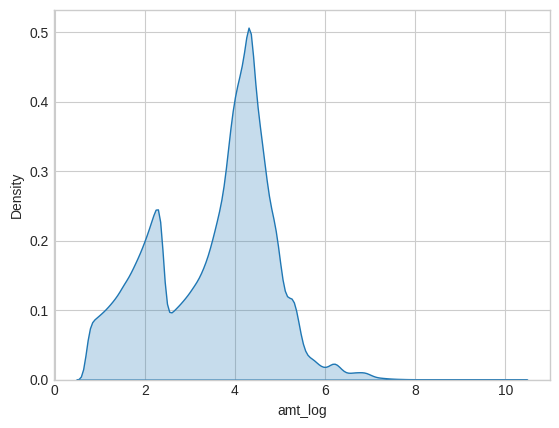

In [ ]:
df["amt_log"] = np.log1p(df["amt"])
sns.kdeplot(df["amt_log"], fill=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["dob"] = pd.to_datetime(df["dob"])
df

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud,amt_log
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,1988-03-09,0,1.786747
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,1978-06-21,0,4.684259
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,1962-01-19,0,5.398660
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,1967-01-12,0,3.828641
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,1986-03-28,0,3.760269
...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,M,519,1966-02-13,0,3.801538
555715,2020-12-31 23:59:09,kids_pets,111.84,M,28739,1999-12-27,0,4.725971
555716,2020-12-31 23:59:15,kids_pets,86.88,F,3684,1981-11-29,0,4.475972
555717,2020-12-31 23:59:24,travel,7.99,M,129,1965-12-15,0,2.196113


In [ ]:
df = pd.get_dummies(df)
df

,trans_date_trans_time,amt,city_pop,dob,is_fraud,amt_log,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
0,2019-01-01 00:00:18,4.97,3495,1988-03-09,0,1.786747,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1,2019-01-01 00:00:44,107.23,149,1978-06-21,0,4.684259,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,2019-01-01 00:00:51,220.11,4154,1962-01-19,0,5.398660,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,2019-01-01 00:01:16,45.00,1939,1967-01-12,0,3.828641,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,2019-01-01 00:03:06,41.96,99,1986-03-28,0,3.760269,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,43.77,519,1966-02-13,0,3.801538,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
555715,2020-12-31 23:59:09,111.84,28739,1999-12-27,0,4.725971,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
555716,2020-12-31 23:59:15,86.88,3684,1981-11-29,0,4.475972,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
555717,2020-12-31 23:59:24,7.99,129,1965-12-15,0,2.196113,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


In [ ]:
df['hr_day'] = df['trans_date_trans_time'].dt.hour

In [ ]:
# create a function which will be applied on the time_of_day variable to transform it to categorical

def time_of_day(hour):
    if  0 <= hour['hr_day'] <= 7:
        val = "night"
    elif 8 <= hour['hr_day'] <= 15:
        val = "morning"
    else:
        val = "midday"
    return val

In [ ]:
df['time_of_day'] = df.apply(time_of_day , axis = 1)

In [ ]:
df.sample(5)

,trans_date_trans_time,amt,city_pop,dob,is_fraud,amt_log,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,hr_day,time_of_day
520452,2020-12-23 21:53:35,82.31,88735,1988-04-09,0,4.422569,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,21,midday
153471,2020-08-14 00:11:22,66.24,4895,1958-10-29,0,4.208268,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,0,night
444948,2020-12-07 14:40:56,1.05,2518,1946-02-02,0,0.717840,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,14,morning
959674,2020-01-20 22:02:23,8.85,111,2000-06-13,0,2.287471,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,22,midday
107475,2019-03-03 05:57:57,76.20,258,1943-12-15,0,4.346399,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,5,night


In [ ]:
# extracting year from dob variable
df['year_birth']= df['dob'].dt.year

In [ ]:
# create the function
def age(age):
    if  2024 - age['year_birth'] <= 29 :
        val = "Young"
    elif 30 <= 2024 - age['year_birth'] <=59 :
        val = "Middle-Aged"
    else:
        val = "Old"
    return val

In [ ]:
df['age'] = df.apply(age , axis = 1)

In [ ]:
df.sample(5)

,trans_date_trans_time,amt,city_pop,dob,is_fraud,amt_log,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,hr_day,time_of_day,year_birth,age
46504,2019-01-28 13:07:39,19.13,32891,1987-02-13,0,3.002211,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,13,morning,1987,Middle-Aged
447235,2020-12-07 21:38:12,2.96,71463,1989-02-08,0,1.376244,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,21,midday,1989,Middle-Aged
1237004,2020-05-31 12:21:31,2.91,1493,1985-03-21,0,1.363537,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,12,morning,1985,Middle-Aged
227186,2019-04-25 00:07:53,96.82,67082,1970-01-08,0,4.583129,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,0,night,1970,Middle-Aged
1230818,2020-05-28 23:12:39,1.85,409656,1985-12-27,0,1.047319,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,23,midday,1985,Middle-Aged


In [ ]:
df = df.drop(['trans_date_trans_time' , 'dob' , 'hr_day' , 'year_birth'] ,axis = 1)

In [ ]:
df.sample(5)

,amt,city_pop,is_fraud,amt_log,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,time_of_day,age
149774,19.53,341043,0,3.021887,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,night,Middle-Aged
733187,40.31,782,0,3.721105,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,midday,Young
80124,2.59,1791,0,1.278152,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,morning,Middle-Aged
522285,37.69,178,0,3.655581,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,morning,Middle-Aged
857994,16.09,1760,0,2.838493,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,midday,Middle-Aged


In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.sample(5)

,amt,city_pop,is_fraud,amt_log,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,time_of_day_midday,time_of_day_morning,time_of_day_night,age_Middle-Aged,age_Old,age_Young
265304,169.74,4172,0,5.140142,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False
466063,18.47,1979,0,2.968875,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False
758140,11.15,4542,0,2.497329,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True
576962,97.90,1263321,0,4.594109,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False
404876,15.91,172817,0,2.827905,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,False


In [ ]:
df.dtypes

amt                        float64
city_pop                     int64
is_fraud                     int64
amt_log                    float64
category_entertainment        bool
category_food_dining          bool
category_gas_transport        bool
category_grocery_net          bool
category_grocery_pos          bool
category_health_fitness       bool
category_home                 bool
category_kids_pets            bool
category_misc_net             bool
category_misc_pos             bool
category_personal_care        bool
category_shopping_net         bool
category_shopping_pos         bool
category_travel               bool
gender_F                      bool
gender_M                      bool
time_of_day_midday            bool
time_of_day_morning           bool
time_of_day_night             bool
age_Middle-Aged               bool
age_Old                       bool
age_Young                     bool
dtype: object

In [ ]:
y=df['is_fraud'].values
X=df.drop("is_fraud", axis='columns').values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1481915, 25)
(1481915,)
(370479, 25)
(370479,)


In [ ]:
method = SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
print(X_resampled.shape)
print(y_resampled.shape)

(2948434, 25)
(2948434,)


In [ ]:
#logistic regression
model=LogisticRegression()
model.fit(X_resampled,y_resampled)
y_pred=model.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.14      0.24    368526
           1       0.01      0.95      0.01      1953

    accuracy                           0.14    370479
   macro avg       0.50      0.55      0.13    370479
weighted avg       0.99      0.14      0.24    370479

Confusion matrix:
 [[ 50687 317839]
 [    89   1864]]
Share of Non-Fraud in Test Data: 0.9947


In [ ]:
#decision tree
model=DecisionTreeClassifier()
model.fit(X_resampled,y_resampled)
y_pred=model.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.72      0.78      0.75      1953

    accuracy                           1.00    370479
   macro avg       0.86      0.89      0.88    370479
weighted avg       1.00      1.00      1.00    370479

Confusion matrix:
 [[367932    594]
 [   420   1533]]
Share of Non-Fraud in Test Data: 0.9947


In [ ]:
#random forest
model2 = RandomForestClassifier(random_state=5)
model2.fit(X_resampled,y_resampled)
predicted=model2.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.72      0.80      0.76      1953

    accuracy                           1.00    370479
   macro avg       0.86      0.90      0.88    370479
weighted avg       1.00      1.00      1.00    370479

Confusion matrix:
 [[367919    607]
 [   382   1571]]
Share of Non-Fraud in Test Data: 0.9947


In [ ]:
#xgboost
model=XGBClassifier()
model.fit(X_resampled,y_resampled)
y_pred=model.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.54      0.87      0.67      1953

    accuracy                           1.00    370479
   macro avg       0.77      0.93      0.83    370479
weighted avg       1.00      1.00      1.00    370479

Confusion matrix:
 [[367096   1430]
 [   247   1706]]
Share of Non-Fraud in Test Data: 0.9947
